# Cross Validation and Prediction Using Regression Tree

# Practice

#### Importing Liabraries 

In [1]:
#data manipulation
import pandas as pd
import numpy as np

#modelling utilities
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,f1_score,precision_score,roc_auc_score
from sklearn.model_selection import cross_val_score,cross_val_predict,train_test_split,GridSearchCV
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

#plotting liabraries
import matplotlib.pyplot as plt
plt.rc('font',size=14)
import seaborn as sb
sb.set(style='white')
sb.set(style='whitegrid',color_codes=True)

import warnings
warnings.simplefilter(action='ignore')

#### Importing Data 

In [2]:
# Reading excel train data file into DataFrame
df=pd.read_excel(r'C:\Users\Admin\Desktop\Machine Learning\Repository\DS2_C5_S5_HR_Data_Practice.xlsx')

# Previewing the data
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,salary_num
0,0.38,0.53,2,157,3,0,1,0,sales,low,4649
1,0.80,0.86,5,262,6,0,1,0,sales,medium,34126
2,0.11,0.88,7,272,4,0,1,0,sales,medium,40522
3,0.72,0.87,5,223,5,0,1,0,sales,low,6916
4,0.37,0.52,2,159,3,0,1,0,sales,low,10928


In [3]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary', 'salary_num'],
      dtype='object')

### Data Exploration and Visualization

In [4]:
# exploring the existing data types
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
salary_num                 int64
dtype: object

In [5]:
# exploring the numeric data types
df.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0
salary_num,14999.0,30085.475432,33465.313560,1.00,10334.00,20875.00,38186.50,199768.0


In [6]:
 # exploring the strings
df_string=df.select_dtypes(exclude=[np.number])
df_string.head()

,Department,salary
0,sales,low
1,sales,medium
2,sales,medium
3,sales,low
4,sales,low


In [7]:
# exploring the existing data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
 10  salary_num             14999 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 1.3+ MB


### Task 1.1 : Visualizing the impact of salary on employee retention

[]

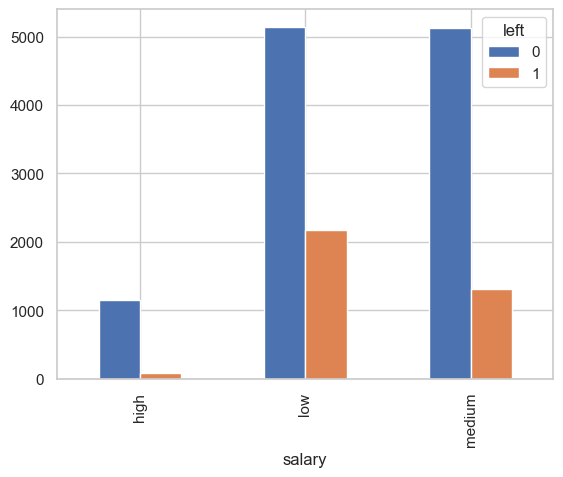

In [8]:
pd.crosstab(df['salary'],df['left']).plot(kind='bar')
plt.plot()

In [9]:
#From the above chart, Salary seems to play an important role in regards to the people who left the company.Majority of employees having low salaries have left the organization

### Task 1.2 : Visualizing departmentwise employee retention rate

[]

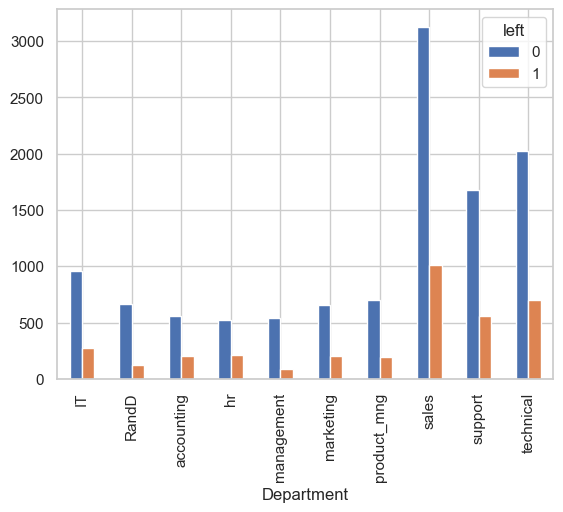

In [10]:
pd.crosstab(df['Department'],df['left']).plot(kind='bar')
plt.plot()

In [11]:
#From the above chart, Department seems to play an important role in regards to the people who left the company.Majority of employees from Sales Department have left the organization

### Data Preprocessing

###  Task 2.1 : Identify if any missing value exists 

In [12]:
 # checking missing values in data
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
salary_num               0
dtype: int64

In [13]:
#No missing value present in the dataset

### Task 2.2 : Identify correlations among the variables 

[]

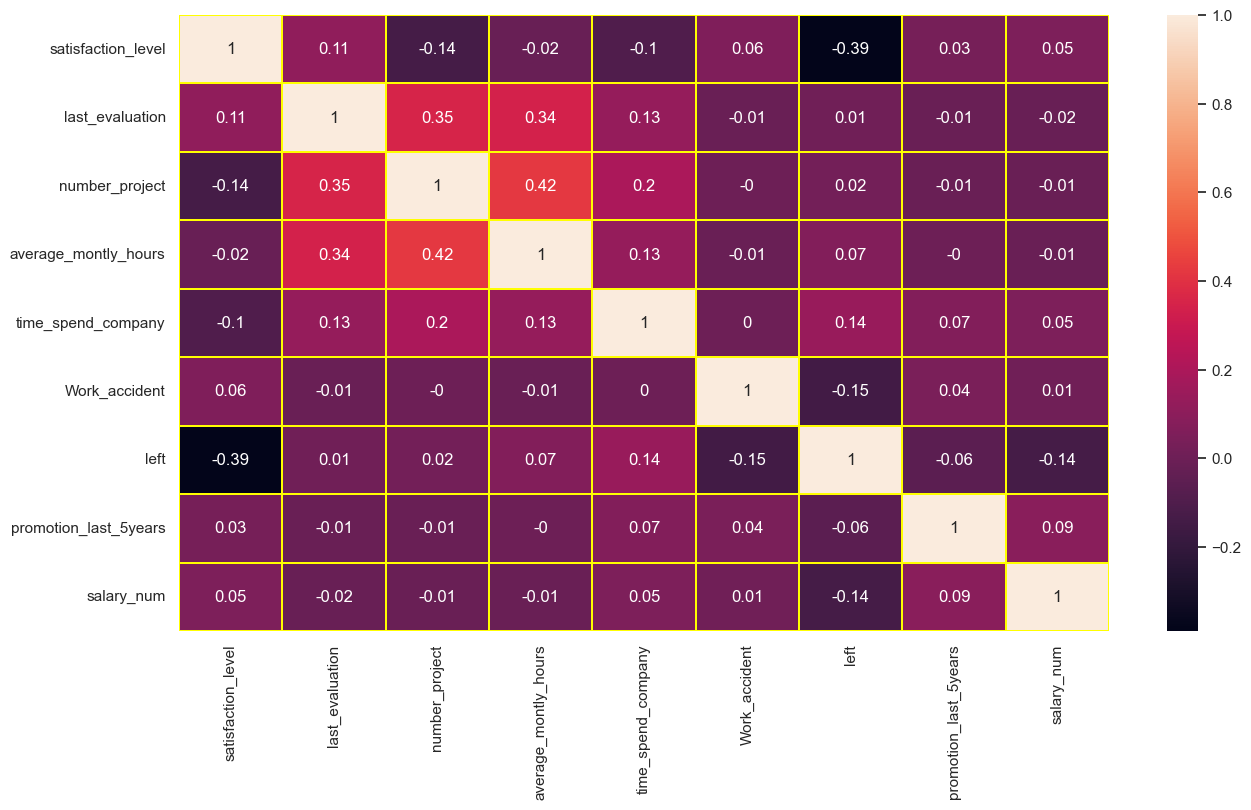

In [14]:
#Data quality | Detect correlations
plt.figure(figsize=(15,8))
sb.heatmap(round(df.corr(),2),annot=True,linecolor='yellow',linewidths=0.2)
plt.plot()

In [15]:
#not removing any feature from this dataset, as we can see none of the columns are highly correlated

### Task 2.3 : Perform data preparation : Salary and department have all text data. Convert them to numbers

In [16]:
#Data Conversion : One hot encoding
salary_dummy=pd.get_dummies(df['salary'],prefix='Salary')
df_dummy=pd.concat([df,salary_dummy],axis=1)

Department_dummy=pd.get_dummies(df['Department'],prefix='Department')
df_dummy=pd.concat([df_dummy,Department_dummy],axis=1)

In [17]:
df_dummy.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,...,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.38,0.53,2,157,3,0,1,0,sales,low,...,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,...,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,sales,medium,...,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,sales,low,...,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,...,0,0,0,0,0,0,0,1,0,0


### Task 2.4 : Exclude the variable 'left' and 'salary' from the dataset 

In [18]:
#Deleting categorical columns from the dataset
df_dummy.drop(columns=['salary','Department'],inplace=True)

In [19]:
df_dummy.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'salary_num', 'Salary_high', 'Salary_low',
       'Salary_medium', 'Department_IT', 'Department_RandD',
       'Department_accounting', 'Department_hr', 'Department_management',
       'Department_marketing', 'Department_product_mng', 'Department_sales',
       'Department_support', 'Department_technical'],
      dtype='object')

### Which parameters have to be excluded in our analysis because they correlate with the 'left' variable ? 

In [20]:
#not removing any feature from this dataset, as we can see none of the columns are highly correlated with 'left' variable

### Modeling - Decision Tree 

### Task 3.1 : Apply data splitting into train and test

In [21]:
X=df_dummy.drop(columns=['salary_num','left'])

In [22]:
Y=df_dummy['salary_num']

In [23]:
# Here splitting data in train and test
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=20)
print('Size of training X data : ',X_train.shape)
print('Size of training Y data : ',Y_train.shape)
print('Size of test X data : ',X_test.shape)
print('Size of test Y data : ',Y_test.shape)

Size of training X data :  (10499, 20)
Size of training Y data :  (10499,)
Size of test X data :  (4500, 20)
Size of test Y data :  (4500,)


In [24]:
df_dummy.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_num,Salary_high,...,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.38,0.53,2,157,3,0,1,0,4649,0,...,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,34126,0,...,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,40522,0,...,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,6916,0,...,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,10928,0,...,0,0,0,0,0,0,0,1,0,0


In [25]:
X.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Salary_high', 'Salary_low', 'Salary_medium',
       'Department_IT', 'Department_RandD', 'Department_accounting',
       'Department_hr', 'Department_management', 'Department_marketing',
       'Department_product_mng', 'Department_sales', 'Department_support',
       'Department_technical'],
      dtype='object')

### Task 3.2 : Apply Train Decision Tree Regressor. Predict the outcome for test data

In [26]:
def rmse(score):
    rmse=np.sqrt(-score)
    print(f'rmse={"{:.2f}".format(rmse)}')

In [27]:
max_depth=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for val in max_depth:
    score=cross_val_score(tree.DecisionTreeRegressor(max_depth=val,random_state=100),X,Y,scoring="neg_mean_squared_error")
    print(f"for max depth : {val}")
    rmse(score.mean())

for max depth : 1
rmse=18591.89
for max depth : 2
rmse=14315.90
for max depth : 3
rmse=14334.42
for max depth : 4
rmse=14433.02
for max depth : 5
rmse=14550.91
for max depth : 6
rmse=14811.81
for max depth : 7
rmse=15057.00
for max depth : 8
rmse=15359.00
for max depth : 9
rmse=15598.86
for max depth : 10
rmse=15998.34
for max depth : 11
rmse=16545.08
for max depth : 12
rmse=16989.56
for max depth : 13
rmse=17340.52
for max depth : 14
rmse=17656.35
for max depth : 15
rmse=17940.12


In [28]:
# Regression Tree - training the model
DT=DecisionTreeRegressor(max_depth=3,min_samples_split=5,max_leaf_nodes=10)
DT.fit(X_train,Y_train)

#Using the trained model to predict the outcome of the X_Test dataset
Y_pred=DT.predict(X_test)
Y_pred

array([120458.72808132,  34893.27910723,  34893.27910723, ...,
        10002.10309482,  10002.10309482,  10002.10309482])

### Calculate the accuracy of training dataset 

In [29]:
# evalating the model on the train data
DT.fit(X_train,Y_train)
print("R-Squared on train dataset={}".format(DT.score(X_test,Y_test)))

R-Squared on train dataset=0.8209390026340778


### Task 3.3 : Identify the accuracy of the model on test data 

In [30]:
# evalating the model on the test data
DT.fit(X_test,Y_test) 
print("R-Squaredon test dataset={}".format(DT.score(X_test,Y_test)))

R-Squaredon test dataset=0.8313385287163272


### Use a decision tree to predict the salary of a person 

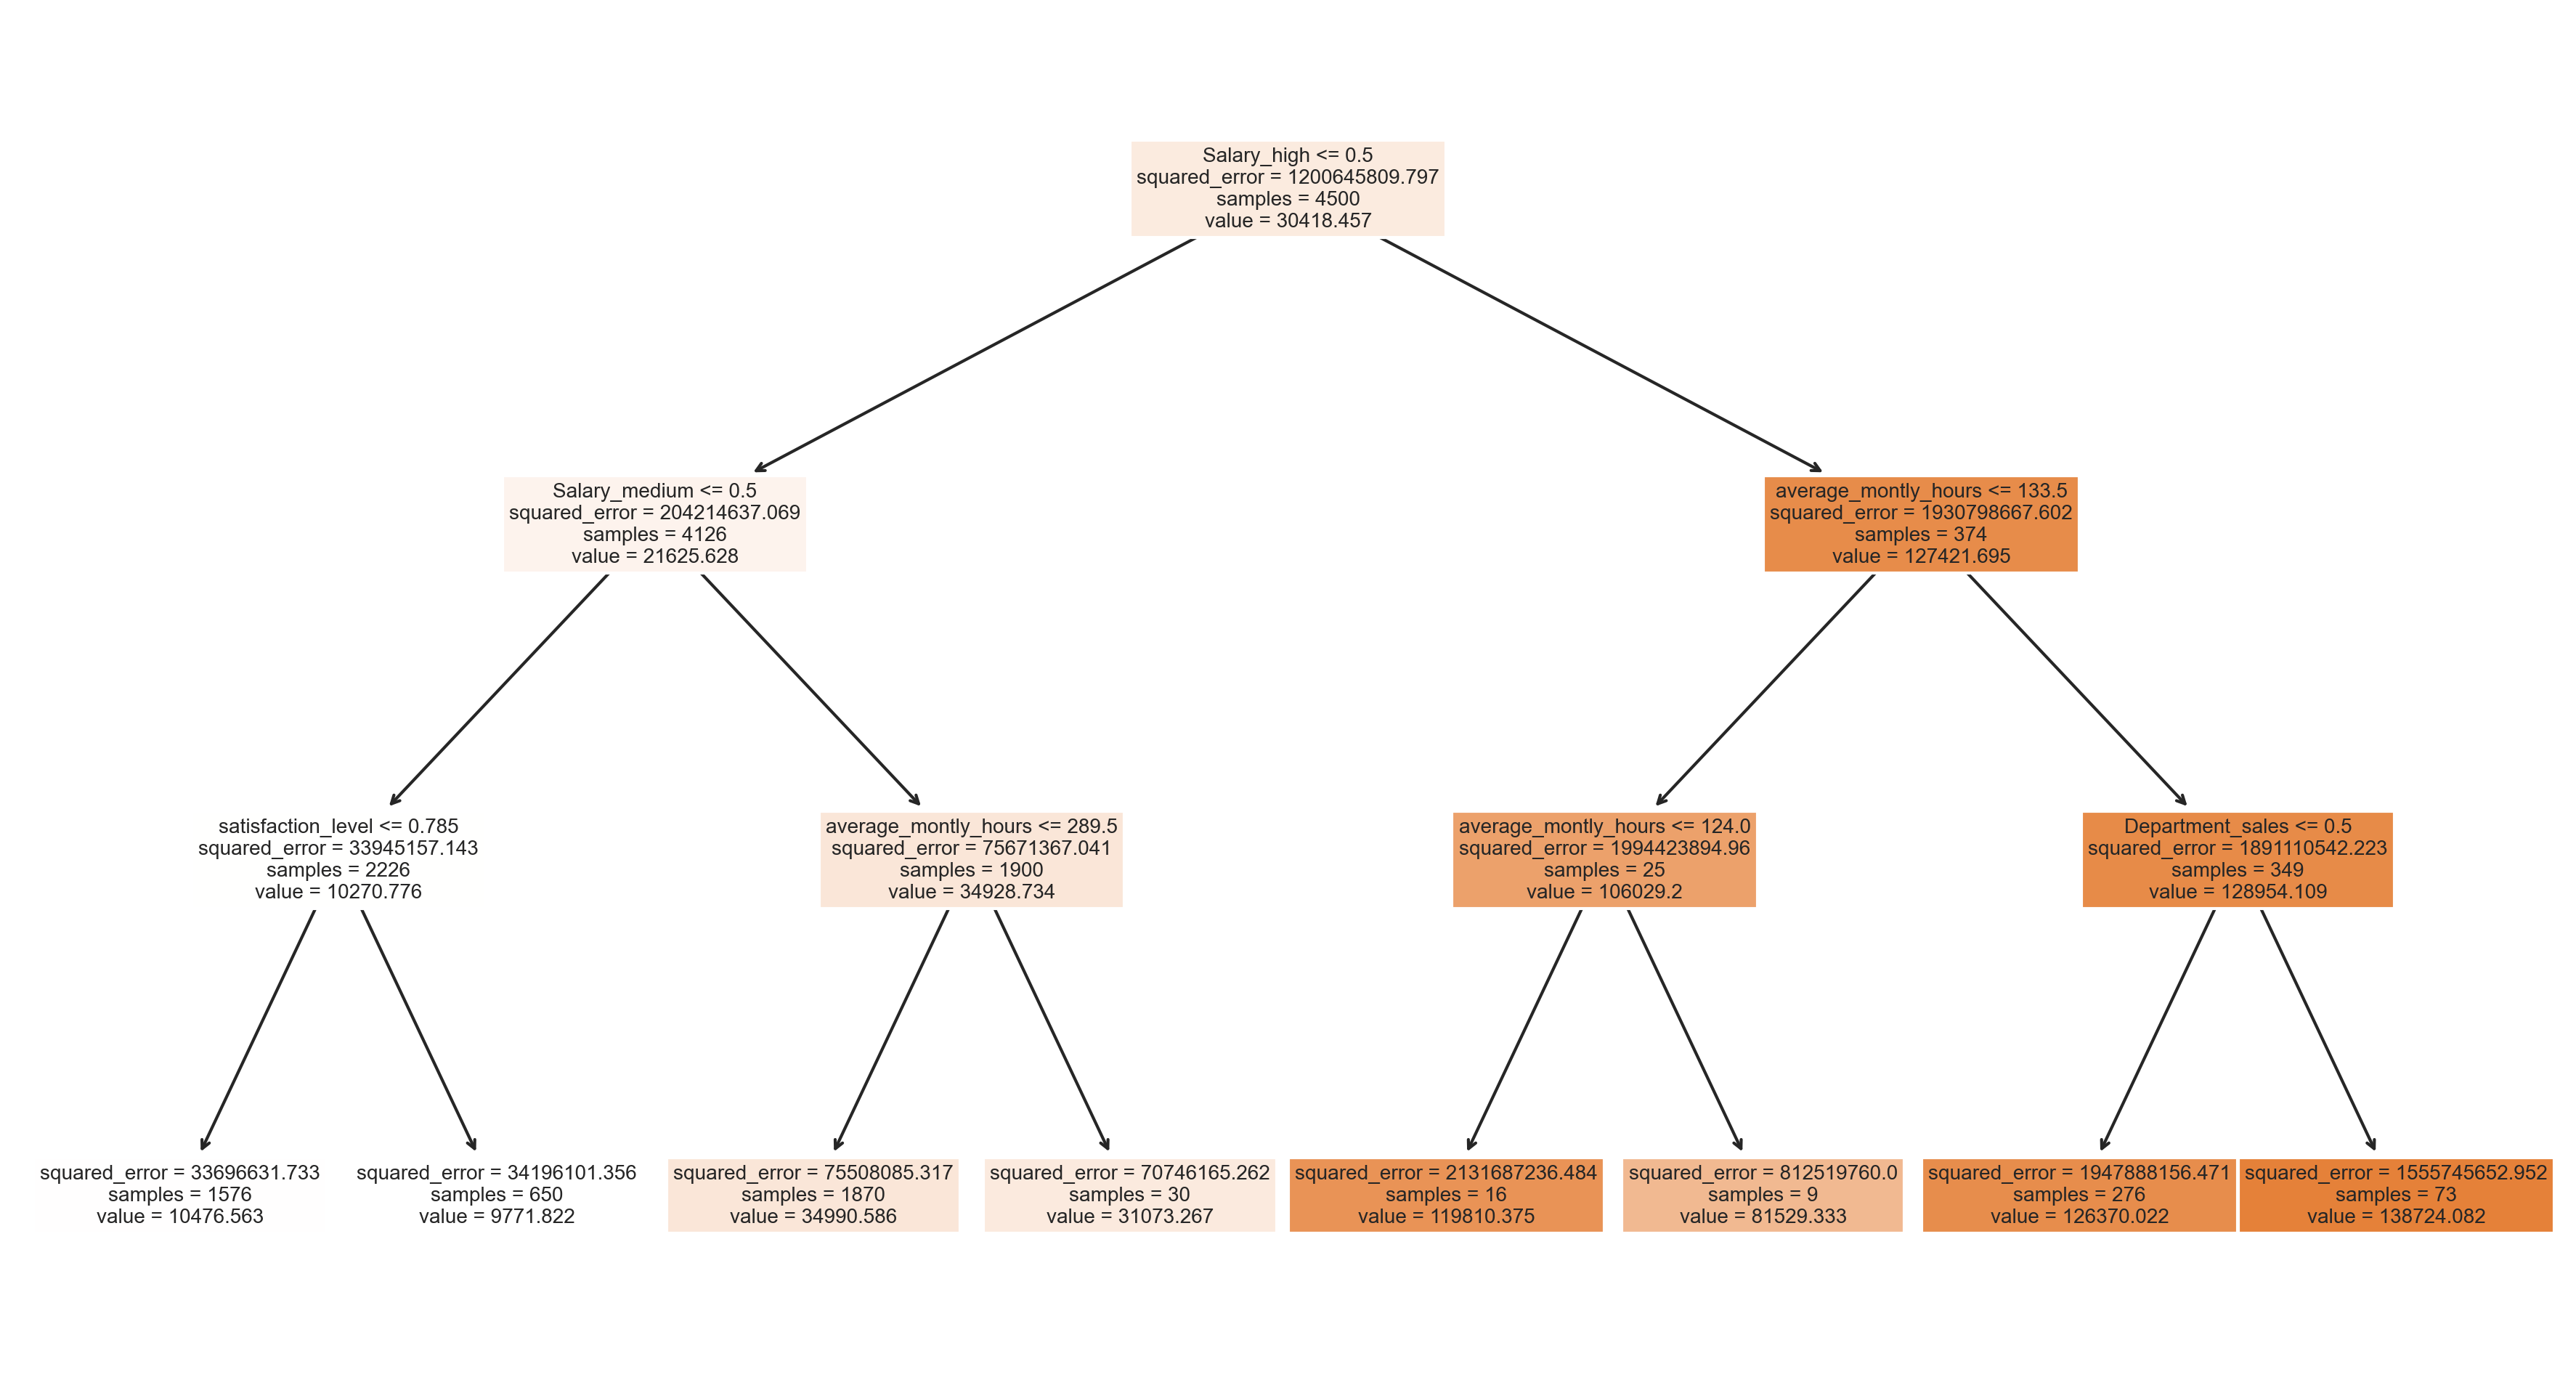

In [31]:
#setting dpi=300 to make image clearer than default
fig,axs=plt.subplots(nrows=1,ncols=1,dpi=300,figsize=(15,8))
tree.plot_tree(DT,feature_names=X.columns,filled=True);

### Evaluation : Confusion Matrix and AUC

### Task 4.1 : Evaluate Confusion matrix : Calculate Accuracy, Recall, F1-score, Precision 

In [32]:
# For regression problem we cant evaluate model using accuracy,Recall, F1-score and Precision 

### Task 4.2  : Evaluate AUC

In [33]:
# AUC is calculated for classification problem only